In [13]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
df = pd.merge(ride_df, city_df, how = 'left', on = 'city')

# Display the data table for preview
df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [14]:
city_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [15]:
# Number of drivers per city
city_df2 = city_df.set_index('city')
drivers_per_city = city_df2[['driver_count', 'type']].sort_index()
drivers_per_city.head()

,driver_count,type
city,,
Amandaburgh,12,Urban
Barajasview,26,Urban
Barronchester,11,Suburban
Bethanyland,22,Suburban
Bradshawfurt,7,Rural


In [16]:
# Number of drivers per city type
drivers_per_city_type = drivers_per_city.groupby('type').sum()
drivers_per_city_type

,driver_count
type,
Rural,78
Suburban,490
Urban,2405


In [17]:
# Number of ride per city
df_grouped = df.groupby('city').count()
rides = pd.merge(df_grouped, city_df, how = 'left', on = 'city')
rides_per_city = rides[['city', 'ride_id', 'type_y']].set_index('city')
rides_per_city = rides_per_city.rename(columns = {'type_y':'type'})
rides_per_city.head()

,ride_id,type
city,,
Amandaburgh,18,Urban
Barajasview,22,Urban
Barronchester,16,Suburban
Bethanyland,18,Suburban
Bradshawfurt,10,Rural


In [18]:
# Number of rides per city type
rides_per_city_type = rides_per_city.groupby('type').sum()
rides_per_city_type

,ride_id
type,
Rural,125
Suburban,625
Urban,1625


In [19]:
# Average fare per city
df_grouped2 = df.groupby('city').mean()
average = pd.merge(df_grouped2, city_df, how = 'left', on = 'city')
average_fair_per_city = average[['city', 'fare', 'type']].set_index('city')
average_fair_per_city['fare'] = round(average_fair_per_city['fare'],2)
average_fair_per_city.head()

,fare,type
city,,
Amandaburgh,24.64,Urban
Barajasview,25.33,Urban
Barronchester,36.42,Suburban
Bethanyland,32.96,Suburban
Bradshawfurt,40.06,Rural


In [20]:
# fare per city type
fare_per_city_type = df.groupby('type').sum()
fare_per_city_type

,fare,ride_id,driver_count
type,,,
Rural,4327.93,580968240341287,537
Suburban,19356.33,3106884522576766,8570
Urban,39854.38,7919412664056093,59602


## Bubble Plot of Ride Sharing Data

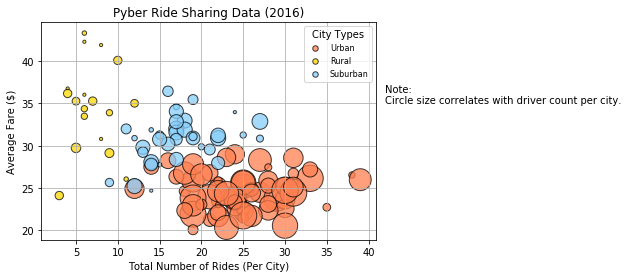

In [21]:
# Obtain the x and y coordinates for each of the three city types
# Build the scatter plots for each city types
# Incorporate the other graph properties
# Create a legend
# Incorporate a text label regarding circle size
# Save Figure

# Urban data
x_urbandf = rides_per_city.loc[rides_per_city['type'] == 'Urban']
x_urban = x_urbandf['ride_id']

y_urbandf = average_fair_per_city.loc[average_fair_per_city['type'] == 'Urban']
y_urban = y_urbandf['fare']

z_urbandf = drivers_per_city.loc[drivers_per_city['type'] == 'Urban']
z_urban = z_urbandf['driver_count']

# Suburban data
x_suburbandf = rides_per_city.loc[rides_per_city['type'] == 'Suburban']
x_suburban = x_suburbandf['ride_id']

y_suburbandf = average_fair_per_city.loc[average_fair_per_city['type'] == 'Suburban']
y_suburban = y_suburbandf['fare']

z_suburbandf = drivers_per_city.loc[drivers_per_city['type'] == 'Suburban']
z_suburban = z_suburbandf['driver_count']

# rural data
x_ruraldf = rides_per_city.loc[rides_per_city['type'] == 'Rural']
x_rural = x_ruraldf['ride_id']

y_ruraldf = average_fair_per_city.loc[average_fair_per_city['type'] == 'Rural']
y_rural = y_ruraldf['fare']

z_ruraldf = drivers_per_city.loc[drivers_per_city['type'] == 'Rural']
z_rural = z_ruraldf['driver_count']

# Build the scatter plots for each city types
plt.scatter(x_urban, y_urban, label = "Urban", s=z_urban * 10, color=["coral"], edgecolor="black", alpha = 0.75, marker="o")
plt.scatter(x_rural, y_rural, label = "Rural", s=z_rural * 10, color=["gold"], edgecolor="black", alpha = 0.75, marker="o")
plt.scatter(x_suburban, y_suburban, label = "Suburban", s=z_suburban  * 10, color=["lightskyblue"], edgecolor="black", alpha = 0.75, marker="o")
plt.grid()

# Incorporate the other graph properties
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")

# Create a legend
legend = plt.legend(fontsize = 8, title= "City Types", loc="best") 

# Adjust the legend 
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(42,35,"Note: \nCircle size correlates with driver count per city.", fontsize = 10)

# Save figure with the parameter bbox_inches to fit the whole image
plt.savefig("Images/PyberRideSharingData.png", bbox_inches="tight")

In [22]:
# Show plot
plt.show()

## Total Fares by City Type

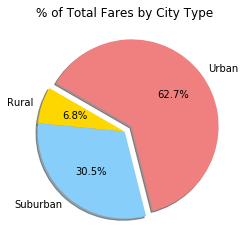

In [23]:
# Calculate Type Percents
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
labels = ['Rural', 'Suburban', 'Urban']

# Build Pie Chart
plt.pie(fare_per_city_type['fare'], explode = explode, labels = labels, colors = colors, autopct = "%1.1f%%", shadow = True, startangle = 150)
plt.title('% of Total Fares by City Type')

        
# Save Figure
plt.savefig("Images/PyberFaresByCityType.png", bbox_inches="tight")

In [24]:
# Show Figure
plt.show()

## Total Rides by City Type

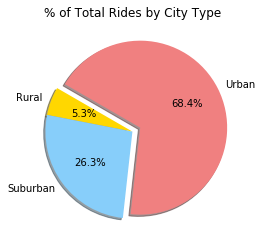

In [25]:
# Calculate Ride Percents

# Build Pie Chart
plt.pie(rides_per_city_type['ride_id'], explode = explode, labels = labels, colors = colors, autopct = "%1.1f%%", shadow = True, startangle = 150)
plt.title('% of Total Rides by City Type')

        
# Save Figure
plt.savefig("Images/PyberRidesByCityType.png", bbox_inches="tight")


In [26]:
# Show Figure
plt.show()

## Total Drivers by City Type

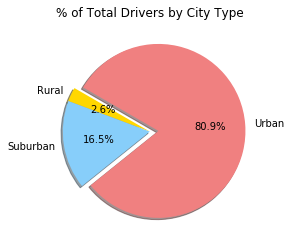

In [27]:
# Calculate Driver Percents

# Build Pie Charts
plt.pie(drivers_per_city_type['driver_count'], explode = explode, labels = labels, colors = colors, autopct = "%1.1f%%", shadow = True, startangle = 150)
plt.title('% of Total Drivers by City Type')

        
# Save Figure
plt.savefig("Images/PyberDriversByCityType.png", bbox_inches="tight")


In [28]:
# Show Figure
plt.show()